In [4]:
import cairocffi as cairo

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [5]:
def paint_text(text, w, h, rotate=False, ud=False, multi_fonts=False):
    surface = cairo.ImageSurface(cairo.FORMAT_RGB24, w, h)
    with cairo.Context(surface) as context:
        context.set_source_rgb(1, 1, 1)  # White
        context.paint()
        # this font list works in CentOS 7
        if multi_fonts:
            fonts = [
                'Century Schoolbook', 'Courier', 'STIX',
                'URW Chancery L', 'FreeMono']
            context.select_font_face(
                np.random.choice(fonts),
                cairo.FONT_SLANT_NORMAL,
                np.random.choice([cairo.FONT_WEIGHT_BOLD, cairo.FONT_WEIGHT_NORMAL]))
        else:
            context.select_font_face('Courier',
                                     cairo.FONT_SLANT_NORMAL,
                                     cairo.FONT_WEIGHT_BOLD)
        context.set_font_size(25)
        box = context.text_extents(text)
        border_w_h = (4, 4)
        if box[2] > (w - 2 * border_w_h[1]) or box[3] > (h - 2 * border_w_h[0]):
            raise IOError(('Could not fit string into image.'
                           'Max char count is too large for given image width.'))

        # teach the RNN translational invariance by
        # fitting text box randomly on canvas, with some room to rotate
        max_shift_x = w - box[2] - border_w_h[0]
        max_shift_y = h - box[3] - border_w_h[1]
        top_left_x = np.random.randint(0, int(max_shift_x))
        if ud:
            top_left_y = np.random.randint(0, int(max_shift_y))
        else:
            top_left_y = h // 2
        context.move_to(top_left_x - int(box[0]), top_left_y - int(box[1]))
        context.set_source_rgb(0, 0, 0)
        context.show_text(text)

    buf = surface.get_data()
    a = np.frombuffer(buf, np.uint8)
    a.shape = (h, w, 4)
    a = a[:, :, 0]  # grab single channel
    a = a.astype(np.float32) / 255
    a = np.expand_dims(a, 0)
    if rotate:
        a = image.random_rotation(a, 3 * (w - top_left_x) / w + 1)
    #a = speckle(a)

    return a

In [6]:
img = paint_text("chaitu",w=128,h=64)

In [7]:
img.shape

(1, 64, 128)

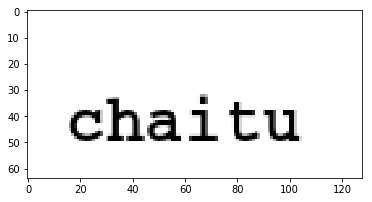

In [8]:
plt.imshow(img[0,:,:],cmap='gray')

In [7]:
import pangocairocffi
import pangocffi

In [8]:
FONT = "Courier Bold 20"

In [9]:
def paint_text_tel(text, w, h, rotate=False, ud=False, multi_fonts=False):
    surface = cairo.ImageSurface(cairo.FORMAT_RGB24, w, h)
    with cairo.Context(surface) as context:
        context.set_source_rgb(1, 1, 1)  # White
        context.paint()
        # this font list works in CentOS 7
        if multi_fonts:
            fonts = [
                'Century Schoolbook', 'Courier', 'STIX',
                'URW Chancery L', 'FreeMono']
            context.select_font_face(
                np.random.choice(fonts),
                cairo.FONT_SLANT_NORMAL,
                np.random.choice([cairo.FONT_WEIGHT_BOLD, cairo.FONT_WEIGHT_NORMAL]))
        else:
            context.select_font_face('Courier',
                                     cairo.FONT_SLANT_NORMAL,
                                     cairo.FONT_WEIGHT_BOLD)
        context.set_font_size(25)
        box = context.text_extents(text)
        border_w_h = (8, 8)
        if box[2] > (w - 2 * border_w_h[1]) or box[3] > (h - 2 * border_w_h[0]):
            raise IOError(('Could not fit string into image.'
                           'Max char count is too large for given image width.'))

        # teach the RNN translational invariance by
        # fitting text box randomly on canvas, with some room to rotate
        max_shift_x = w - box[2] - border_w_h[0]
        max_shift_y = h - box[3] - border_w_h[1]
        top_left_x = np.random.randint(0, int(max_shift_x))
        if ud:
            top_left_y = np.random.randint(0, int(max_shift_y))
        else:
            top_left_y = h // 2
        #context.move_to(top_left_x - int(box[0]), top_left_y - int(box[1]))
        context.set_source_rgb(0, 0, 0)
        desc = pangocffi.FontDescription()
        desc.set_family("Courier.TTF")
        desc.set_size(20)
        pangocffi.glyph_item
        layout = pangocairocffi.create_layout(context)
        #desc = pangocffi.FontDescription.set_size(layout,size=20)
        #layout.set_font_description(desc=desc)
        layout.set_alignment(pangocffi.Alignment.RIGHT)
        layout.set_alignment(pangocffi.Alignment.CENTER)
        tex ='<span font="Courier Bold 15">'+text+'</span>'
        layout.set_markup(tex)
        #layout.set_text(text)
        #layout.set_font_description(desc)
        pangocairocffi.show_layout(context,layout)
        
        #context.show_text(text)

    buf = surface.get_data()
    a = np.frombuffer(buf, np.uint8)
    a.shape = (h, w, 4)
    a = a[:, :, 0]  # grab single channel
    a = a.astype(np.float32) / 255
    a = np.expand_dims(a, 0)
    if rotate:
        a = image.random_rotation(a, 3 * (w - top_left_x) / w + 1)
    #a = speckle(a)

    return a

In [10]:
img2 = paint_text_tel("chaitu",w=128,h=64)

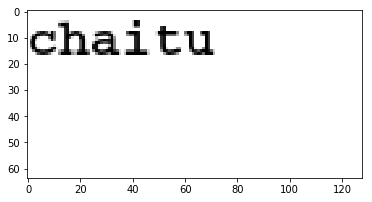

In [11]:
plt.imshow(img2[0,:,:],cmap='gray')

In [12]:
import codecs

In [17]:
with codecs.open('wiki_unique_words.txt', mode='r', encoding='utf-8') as f:   
            i=0
            imgs = []
            words = []
            for line in f:
                word = line.rstrip()
                if(i>5):
                    break;
                else:
                    print(word)
                    words.append(word)
                    img = paint_text_tel(word,128,64)
                    imgs.append(img)
                    i = i+1
                        

చెట్టుకాడ
డోపామైన్డోపమిన్
జిల్లాని
ఉపయోగించేవిను
అత్యవాస
స్తబ్దతనుండి


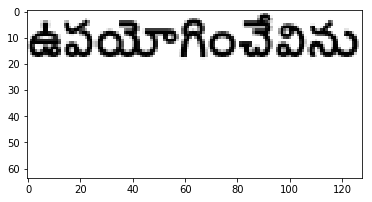

In [14]:
for i in range(4):
    plt.imshow(imgs[i][0,:,:],cmap='gray')

In [15]:
all_chars = (u' ఁంఃఅఆఇఈఉఊఋఌఎఏఐఒఓఔ'
             u'కఖగఘఙచఛజఝఞటఠడఢణతథదధనపఫబభమ'
             u'యరఱలళవశషసహ'
             u'ఽాిీుూృౄెేైొోౌ్'
             u'ౘౙౠౡౢౣ'
             u'౦౧౨౩౪౫౬౭౮౯')


In [16]:
def tel2int(text):
    """
    A basic conversion of unicode telugu text to list of labels (indices)
    Looks each unicode character seperately.
    If not found in all_chars, gives out a 0.
    :param text: str
    :return: list of int
    """
    return [all_chars.find(char) for char in text]

In [18]:
label = tel2int(words[0])

In [19]:
print(label)

[23, 61, 28, 67, 28, 57, 18, 54, 30]


In [20]:
print(tel2int(words[1]))

[30, 65, 38, 54, 42, 63, 37, 67, 30, 65, 38, 42, 55, 37, 67]


In [21]:
print(tel2int(words[2]))

[25, 55, 46, 67, 46, 54, 37, 55]


In [22]:
def labels_to_text(labels):
    ret = []
    for c in labels:
        if c == len(all_chars):  # CTC Blank
            ret.append("")
        else:
            ret.append(all_chars[c])
    return "".join(ret)

In [23]:
print(labels_to_text(label))

చెట్టుకాడ


In [24]:
len(all_chars)

84

In [25]:
file =  codecs.open('wiki_unique_words.txt', mode='r', encoding='utf-8')    
    

In [32]:
def data_fetch(batch_size):
    words_1 = []
    for i in range(batch_size):
        line = file.readline()
        word = line.rstrip()
        words_1.append(word)

    return words_1

In [33]:
d1 = data_fetch(3)

In [35]:
d2 = data_fetch(3)

In [34]:
d1

['ఉపయోగించేవిను', 'అత్యవాస', 'స్తబ్దతనుండి']

In [36]:
d2

['చన్నీటిని', 'గూడూరుదివి', 'కేమికల్స్']

In [37]:
print(data_fetch(4))

['కెరామ్మోహన్\u200cరావుపాపాలు', 'చరితఇలపావులూరి', 'మదలుపెట్టడానికి', 'చలంరామకృష్ణకృష్ణకుమారి']
